<a href="https://colab.research.google.com/github/dmortalla/oeson-ogtip/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Import packages and load the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path = '/content/sample_data/car_prices.csv'
car_prices_df = pd.read_csv(file_path)

### 2. Clean and prepare the dataset then load it

In [ ]:
# Remove duplicates
cleaned_car_prices_df = car_prices_df.drop_duplicates()

# Remove rows with null values
cleaned_car_prices_df = cleaned_car_prices_df.dropna()

# Convert necessary columns to appropriate data types
cleaned_car_prices_df['year'] = cleaned_car_prices_df['year'].astype(int)
cleaned_car_prices_df['odometer'] = cleaned_car_prices_df['odometer'].astype(float)
cleaned_car_prices_df['condition'] = cleaned_car_prices_df['condition'].astype(float)
cleaned_car_prices_df['sellingprice'] = cleaned_car_prices_df['sellingprice'].astype(float)
cleaned_car_prices_df['mmr'] = cleaned_car_prices_df['mmr'].astype(float)

# Convert sale date to datetime format
cleaned_car_prices_df['saledate'] = pd.to_datetime(cleaned_car_prices_df['saledate'], utc=True, errors='coerce')

# Extract year and month from the 'saledate'
cleaned_car_prices_df['sale_year'] = cleaned_car_prices_df['saledate'].dt.year
cleaned_car_prices_df['sale_month'] = cleaned_car_prices_df['saledate'].dt.month

# Filter out unrealistic data (e.g., condition should be between 1 and 5, and prices should be positive)
cleaned_car_prices_df = cleaned_car_prices_df[
    (cleaned_car_prices_df['condition'] >= 1) &
    (cleaned_car_prices_df['condition'] <= 5) &
    (cleaned_car_prices_df['sellingprice'] > 0) &
    (cleaned_car_prices_df['mmr'] > 0)
]

# Save the cleaned dataset to a new CSV file
cleaned_car_prices_df.to_csv('/content/sample_data/cleaned_car_prices.csv', index=False)

# Load the cleaned car prices dataset
cleaned_car_prices_df = pd.read_csv('/content/sample_data/cleaned_car_prices.csv')


<ipython-input-6-e1e94b44ea6b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_car_prices_df['year'] = cleaned_car_prices_df['year'].astype(int)
<ipython-input-6-e1e94b44ea6b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_car_prices_df['odometer'] = cleaned_car_prices_df['odometer'].astype(float)
<ipython-input-6-e1e94b44ea6b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

### 3. Preliminary EDA

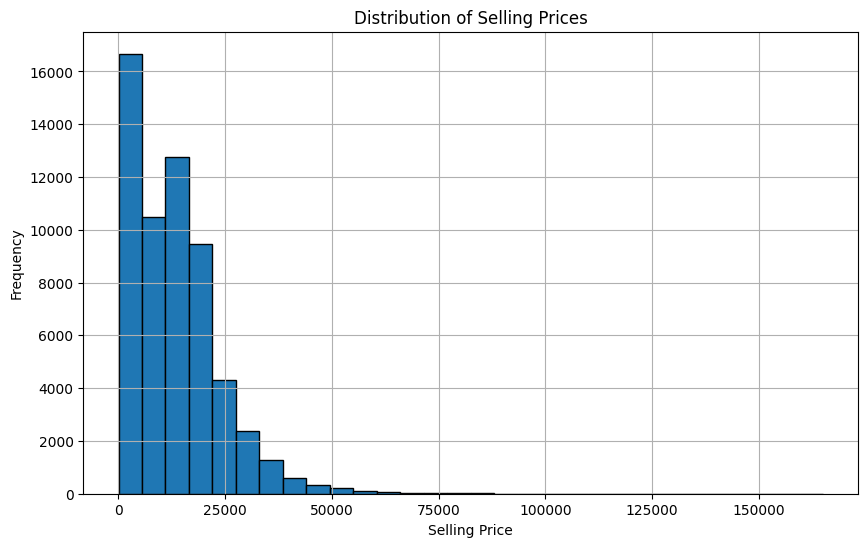

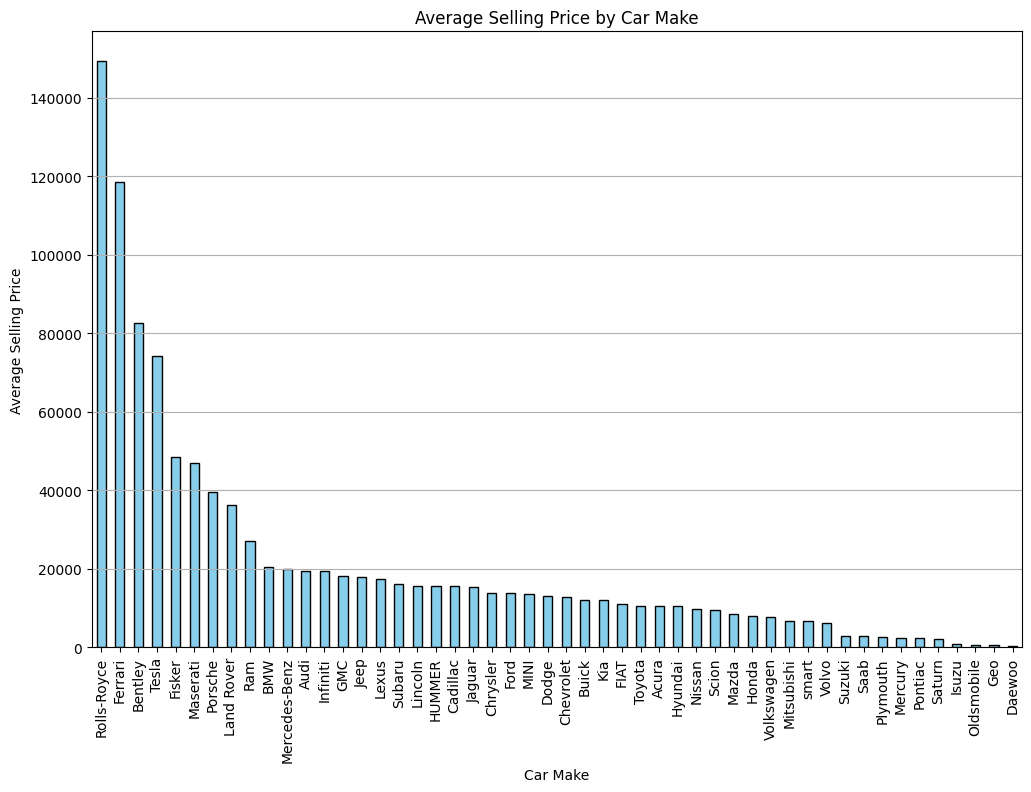

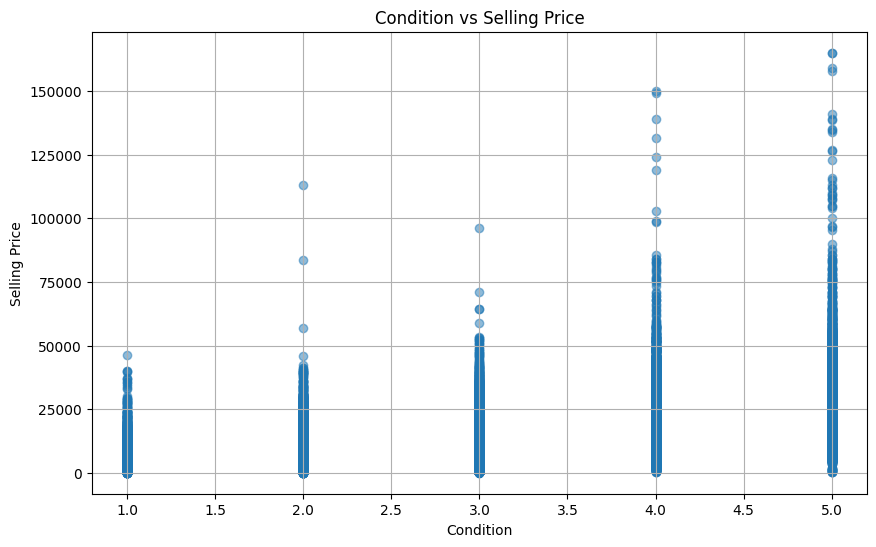

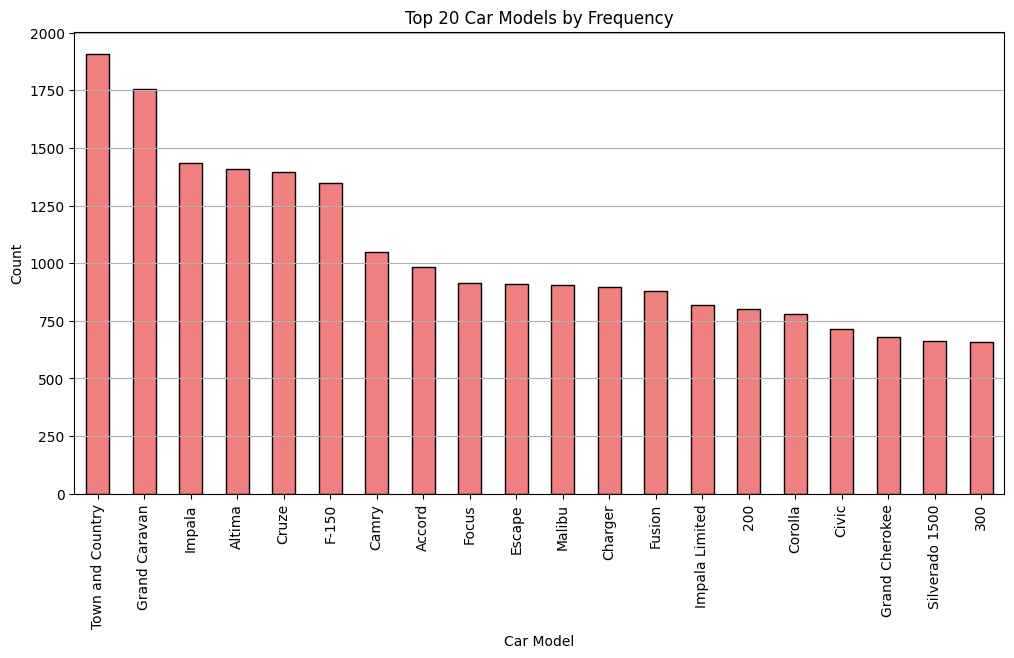

In [ ]:
# Distribution of Selling Prices
plt.figure(figsize=(10,6))
plt.hist(cleaned_car_prices_df['sellingprice'], bins=30, edgecolor='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Average Selling Price by Car Make
plt.figure(figsize=(12,8))
avg_price_by_make = cleaned_car_prices_df.groupby('make')['sellingprice'].mean().sort_values(ascending=False)
avg_price_by_make.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Selling Price by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Average Selling Price')
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()

# Condition vs Selling Price Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(cleaned_car_prices_df['condition'], cleaned_car_prices_df['sellingprice'], alpha=0.5)
plt.title('Condition vs Selling Price')
plt.xlabel('Condition')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

# Top 20 Car Models by Frequency
plt.figure(figsize=(12,6))
top_models = cleaned_car_prices_df['model'].value_counts().nlargest(20)
top_models.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 20 Car Models by Frequency')
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


### Task 1: Identify Trends in Vehicle Sales Over Time

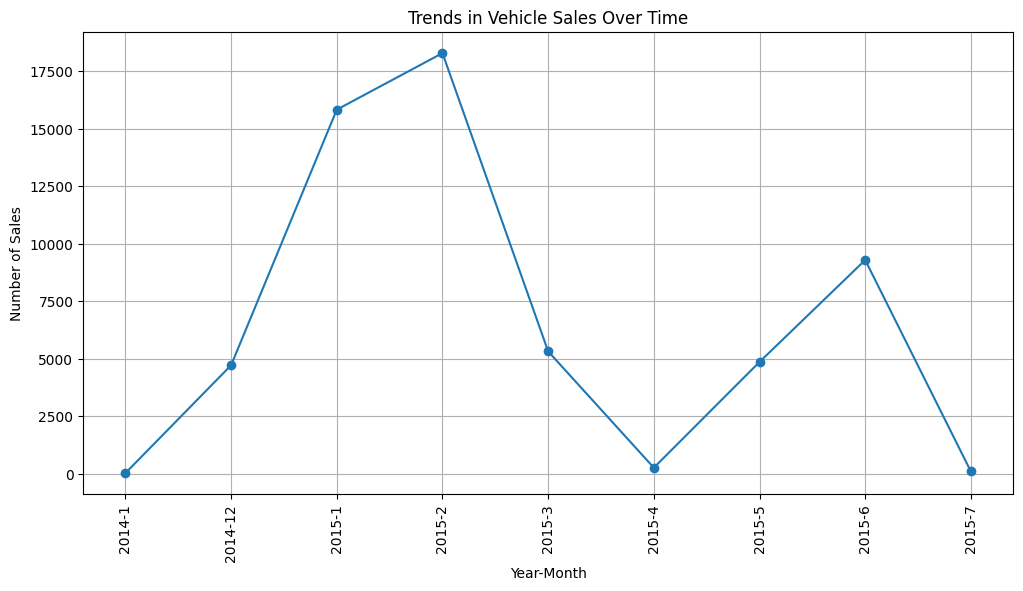

In [ ]:
# Group the data by year and month to analyze the trends in vehicle sales over time
sales_trends = cleaned_car_prices_df.groupby(['sale_year', 'sale_month']).size().reset_index(name='sales_count')

# Plotting the sales trends over time
plt.figure(figsize=(12,6))
plt.plot(sales_trends['sale_year'].astype(str) + '-' + sales_trends['sale_month'].astype(str),
         sales_trends['sales_count'], marker='o')
plt.title('Trends in Vehicle Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Task 2: Analyze the Impact of Vehicle Condition and Mileage on Selling Prices

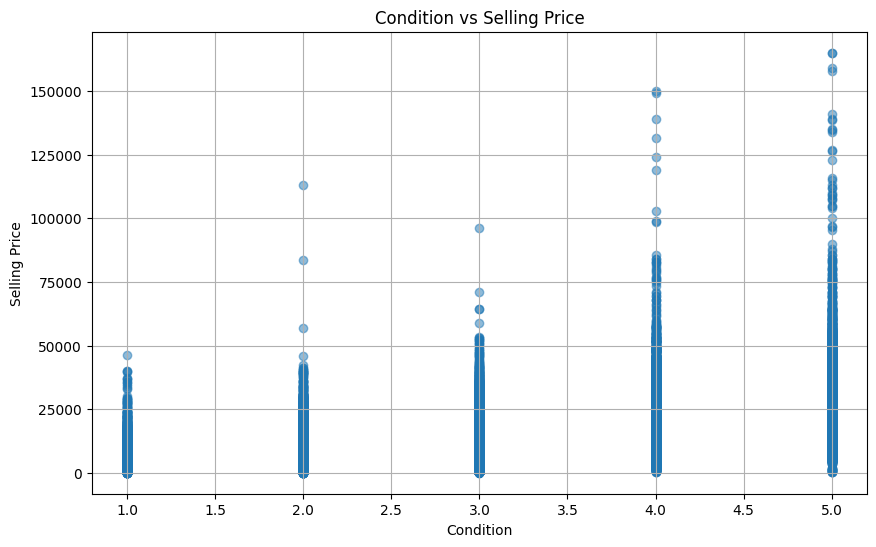

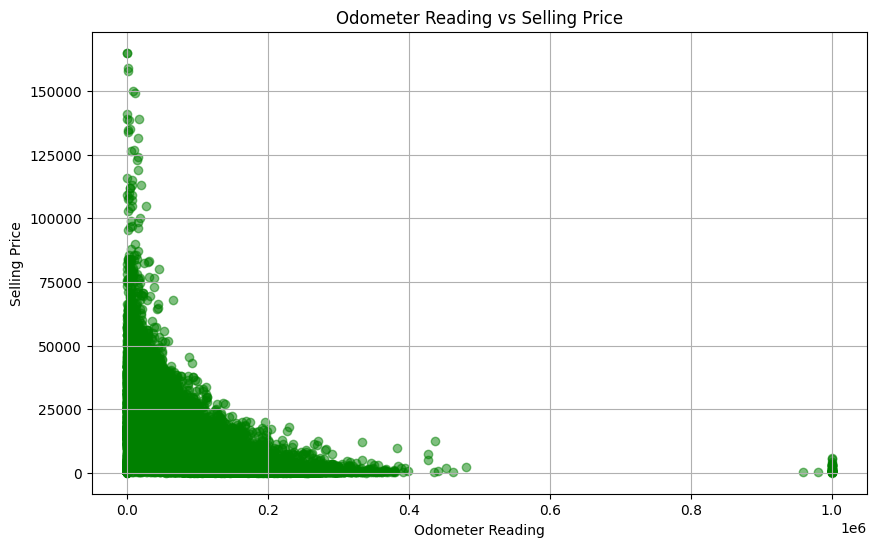

In [ ]:
# Scatter plot for condition vs selling price
plt.figure(figsize=(10,6))
plt.scatter(cleaned_car_prices_df['condition'], cleaned_car_prices_df['sellingprice'], alpha=0.5)
plt.title('Condition vs Selling Price')
plt.xlabel('Condition')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

# Scatter plot for odometer vs selling price
plt.figure(figsize=(10,6))
plt.scatter(cleaned_car_prices_df['odometer'], cleaned_car_prices_df['sellingprice'], alpha=0.5, color='green')
plt.title('Odometer Reading vs Selling Price')
plt.xlabel('Odometer Reading')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

### Task 3: Understand the Relationship Between MMR Values and Actual Selling Prices

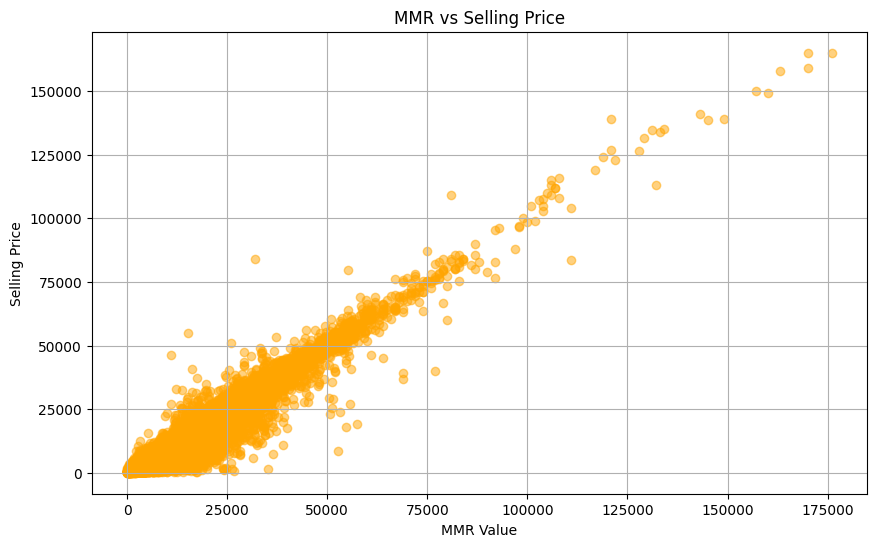

In [ ]:
# Scatter plot comparing MMR values and selling prices
plt.figure(figsize=(10,6))
plt.scatter(cleaned_car_prices_df['mmr'], cleaned_car_prices_df['sellingprice'], alpha=0.5, color='orange')
plt.title('MMR vs Selling Price')
plt.xlabel('MMR Value')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

### Task 4: Determine the Most Popular Vehicle Makes and Models

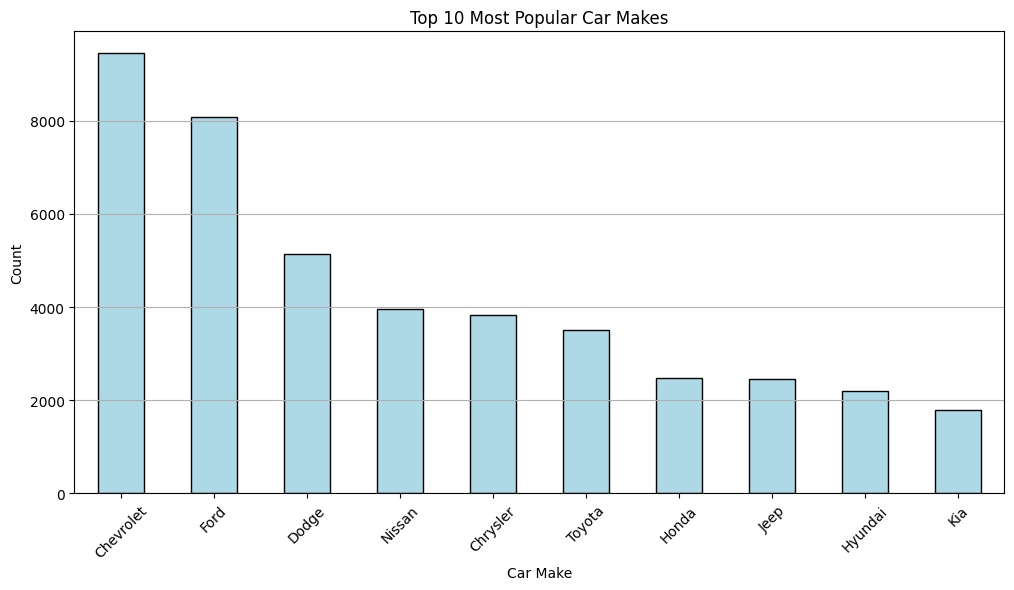

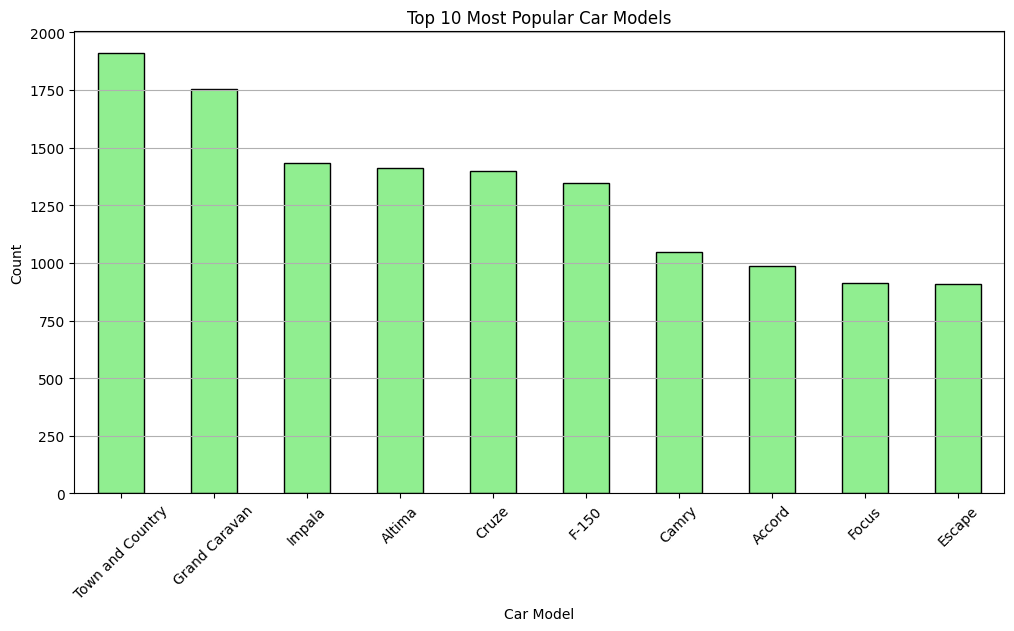

In [ ]:
# Most popular car makes
plt.figure(figsize=(12,6))
top_makes = cleaned_car_prices_df['make'].value_counts().nlargest(10)
top_makes.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Top 10 Most Popular Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

# Most popular car models
plt.figure(figsize=(12,6))
top_models = cleaned_car_prices_df['model'].value_counts().nlargest(10)
top_models.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 Most Popular Car Models')
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()